# ***EDA: Estadísticas de los jugadores de la NBA 2022-2023***

<div style="text-align: center;">
  <img src="nba.jpeg" alt="Texto alternativo" width="auto" height="400">
</div>

### **1.Introducción**

Este análisis se centra en el estudio de los registros de jugadores de la NBA de la temporara regular 2022-2023, a partir de caracteristicas demográficas, por equipos y estadísticas en el juego.

Como principal objetivo se desea conocer que variables pueden estar relacionadas con el rendimiento de los jugadores y como afectan en el mismo.

### **2.Librerías**

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max.column',None)

### **3.Carga de datos**

In [8]:
df = pd.read_csv('../data/raw/NBA.csv',encoding='latin1', sep=";")

### **4.Primera exploración**

**4.1.Primera visualización del DataFrame**

In [9]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,0.5,2.0,0.269,3.0,5.4,0.564,0.521,1.6,2.3,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,0.0,0.0,0.000,3.7,6.2,0.599,0.597,1.1,3.1,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,0.0,0.2,0.083,8.0,14.7,0.545,0.541,4.3,5.4,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,1.4,3.9,0.355,1.4,2.7,0.532,0.532,0.9,1.2,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,1.2,3.5,0.353,2.0,3.4,0.591,0.560,1.4,1.9,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0


In [10]:
df.tail()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
674,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,0.545,0.1,0.6,0.176,1.9,3.0,0.622,0.561,0.3,0.5,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,0.429,2.1,6.3,0.335,6.1,12.7,0.476,0.485,7.8,8.8,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,0.593,0.3,0.8,0.429,1.4,2.2,0.650,0.648,0.6,0.7,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,0.627,0.0,0.1,0.000,2.5,3.8,0.649,0.627,1.6,2.3,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5
678,539,Ivica Zubac,C,25,LAC,76,76,28.6,4.3,6.8,0.634,0.0,0.0,0.000,4.3,6.7,0.637,0.634,2.2,3.1,0.697,3.1,6.8,9.9,1.0,0.4,1.3,1.5,2.9,10.8


**4.2.Estructura del DataFrame**

In [11]:
df.shape

(679, 30)

**4.3.Clasificación de variables y revisión de valores faltantes**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      679 non-null    int64  
 1   Player  679 non-null    object 
 2   Pos     679 non-null    object 
 3   Age     679 non-null    int64  
 4   Tm      679 non-null    object 
 5   G       679 non-null    int64  
 6   GS      679 non-null    int64  
 7   MP      679 non-null    float64
 8   FG      679 non-null    float64
 9   FGA     679 non-null    float64
 10  FG%     679 non-null    float64
 11  3P      679 non-null    float64
 12  3PA     679 non-null    float64
 13  3P%     679 non-null    float64
 14  2P      679 non-null    float64
 15  2PA     679 non-null    float64
 16  2P%     679 non-null    float64
 17  eFG%    679 non-null    float64
 18  FT      679 non-null    float64
 19  FTA     679 non-null    float64
 20  FT%     679 non-null    float64
 21  ORB     679 non-null    float64
 22  DR

**4.4.Revisión de duplicados**

In [6]:
df.duplicated().sum()

0

**4.5.Resumen estadístico general del DataFrame**

In [13]:
df.describe(exclude='object').round(2)

,Rk,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
count,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00,679.00
mean,265.98,26.03,43.34,20.07,19.46,3.25,6.92,0.46,1.00,2.78,0.32,2.25,4.14,0.53,0.53,1.37,1.77,0.71,0.84,2.62,3.46,2.01,0.60,0.37,1.07,1.66,8.86
std,154.96,4.33,24.73,25.77,9.42,2.36,4.80,0.12,0.86,2.21,0.14,1.91,3.38,0.15,0.11,1.48,1.79,0.22,0.73,1.72,2.28,1.89,0.39,0.37,0.80,0.77,6.63
min,1.00,19.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,132.50,23.00,22.00,0.00,12.15,1.50,3.40,0.42,0.30,1.00,0.29,0.90,1.70,0.48,0.50,0.40,0.60,0.67,0.30,1.40,1.80,0.80,0.30,0.10,0.50,1.20,4.10
50%,264.00,25.00,45.00,6.00,18.80,2.60,5.70,0.45,0.80,2.40,0.35,1.60,3.10,0.54,0.54,0.90,1.20,0.76,0.70,2.30,3.00,1.30,0.50,0.30,0.90,1.60,6.90
75%,399.50,29.00,65.50,36.50,27.55,4.20,9.20,0.50,1.50,4.15,0.39,3.00,5.55,0.59,0.58,1.70,2.30,0.84,1.10,3.40,4.50,2.70,0.80,0.50,1.40,2.20,11.55
max,539.00,42.00,83.00,83.00,41.00,11.20,22.20,1.00,4.90,11.40,1.00,10.50,17.80,1.00,1.00,10.00,12.30,1.00,5.10,9.60,12.50,10.70,3.00,3.00,4.10,5.00,33.10


In [14]:
df.describe(include='object')

,Player,Pos,Tm
count,679,679,679
unique,539,8,31
top,Dorian Finney-Smith,SG,TOT
freq,3,168,70


**4.6.Descripción general de los datos**

En esta primera exploración observamos los siguiente:

* El conjunto de datos contiene 679 entradas (jugadores) y diversas variables como edad, juegos jugados, minutos por juego, tiros de campo, porcentajes, rebotes, asistencias, robos, bloqueos, pérdidas, faltas personales y puntos por juego.

* Nuestro DataFrame tiene 679 observaciones y 30 columnas. De las 30 variables que contiene, 3 son cualitativas, Player, Pos y Tm y el resto son cuantitativas. No tenemos valores duplicados. 

* Valores faltantes: No hay valores faltantes en ninguna de las columnas, lo que indica que el conjunto de datos está completo.

### **5.Estudio de las variables**

**5.1.Explicación de las variables**

A continuación vamos a dar una breve explicación sobre cada variable.

In [15]:
df.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

* Rk: Rango. Posición relativa de un jugador en comparación con otros jugadores.Forma de evaluar y comparar su desempeño en relación con otros.

* Player : Nombre del jugador.

* Pos: Posición.

* Age: Edad del jugador.

* Tm: Equipo.

* G: Partidos disputados.

* GS: Partidos iniciados. Titularidades.

* MP: Minutos jugados por partido.

* FG : Canastas por partido.

* FGA : Intentos de canastas por partido.

* FG%: Porcentaje de canastas.

* 3P: Triples por partido.

* 3PA: Intentos de triples por partido.

* 3P%: Porcentaje de triples.

* 2P: Canastas de de 2 puntos por partido.

* 2PA: Intentos de canastas de 2 puntos por partido.

* 2P%: Porcentaje de canastas de 2 puntos

* eFG%: Porcentaje Efectivo de Tiros de Campo. Se calcula de la siguiente manera:

        EFg% = (Canastas + 0.5 * Triples Anotados) / Intentos de Canastas

* FT : Tiros libres por partido.

* FTA: Intentos de tiros libres por partido.

* FT%: Porcentaje de tiros libres.

* ORB: Rebotes ofensivos por partido.

* DRB: Rebotes defensivos por partido.

* TRB: Rebotes totales por partido.

* AST: Asistencias por partido.

* STL: Robos por partido.

* BLK: Tapones por partido.

* TOV: Pérdidas de balón por partido.

* PF : Faltas personales por partido.

* PTS: Puntos por partido.

**5.2.Cardinalidad**

Haremos un estudio sobre la cardinalidad, para observar el número de valores únicos de cada variable
y ver si encontramos algo significativo para nuestro estudio.

In [16]:
cardinalidad = pd.DataFrame({
    'Columna': df.columns,
    'Tipo_Variable':['Discreta' if x == 'int64' else 'Continua' if x=='float64' else 'Nominal' for x in df.dtypes],
    'Cardinalidad%':[round((df[col].nunique())/len(df)*100,2) for col in df.columns]})

cardinalidad

,Columna,Tipo_Variable,Cardinalidad%
0,Rk,Discreta,79.38
1,Player,Nominal,79.38
2,Pos,Nominal,1.18
3,Age,Discreta,3.24
4,Tm,Nominal,4.57
5,G,Discreta,12.22
6,GS,Discreta,11.78
7,MP,Continua,45.36
8,FG,Continua,14.87
9,FGA,Continua,25.63


No observamos nada reseñable en la cardinalidad, la cardinalidad del jugador no es del 100% dado que hay jugadores que jugaron en diferentes equipos durante la misma temporada, lo estudiaremos más adelante.

### **6.Metodología**

 Este análisis propone introducir una metodología para evaluar el rendimiento de los jugadores, a través de la creación de una variable integral que considere múltiples aspectos del juego. Los registros de la NBA en este DataFrame nos muestra una serie de covariables que afectan directamente el rendimiento en la cancha.

 Es por ello que consideraremos al rendimiento (EFF) como una variable nueva creada a partir de la siguiente relación de covariables: 

   **EFF=PTS+TRB+AST+STL+BLK−(FGA−FG)−(FTA−FT)−TOV**

Se considerara el rendimiento a través de la suma de puntos anotados, rebotes, asistencias, robos, tapones, y la resta de los intentos de tiro fallidos, los tiros libres fallidos y las pérdidas de balón. Es una medida integral que intenta capturar la contribución general de un jugador al juego.

. Basándonos en esto, postulamos una serie de afirmaciones a analizar. 

+ ¿La edad(Age) del jugador es un factor importante para el rendimiento?

+ ¿La posición (Pos) en la que se juega afecta el rendimiento?

+ El rendimiento esta relacionado con variables que miden la efectividad en los tiros
2p%
3P%
eFG% (Alta eficiencia de tiro suele ser indicativa de un buen rendimiento tanto a nivel individual como de equipo)
FG%
FT%

+ Los minutos jugados(MP) afectan el rendimiento del jugador. 

+ Los jugadores que tienen mayor rendimiento son titulares en todos los partidos (GS).

+ El número de partidos disputados (G) esta relacionado con el rendimiento de los jugadores.

##### **Creación de la variable rendimiento(EFF)**

In [17]:
df['EFF'] = (df['PTS'] + df['TRB'] + df['AST'] + 
                   df['STL'] + df['BLK'] - 
                   (df['FGA'] - df['FG']) - 
                   (df['FTA'] - df['FT']) - 
                   df['TOV'])

**Guardamos el DataFrame**

In [18]:
df.to_csv('../data/process/df_EFF.csv', index=False)

In [19]:
df = pd.read_csv('../data/process/df_EFF.csv')

In [20]:
df.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,eFG%,FT,FTA,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,EFF
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,0.485,0.5,2.0,0.269,3.0,5.4,0.564,0.521,1.6,2.3,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2,11.7
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,0.597,0.0,0.0,0.000,3.7,6.2,0.599,0.597,1.1,3.1,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6,17.9
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,0.540,0.0,0.2,0.083,8.0,14.7,0.545,0.541,4.3,5.4,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4,24.3
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,0.427,1.4,3.9,0.355,1.4,2.7,0.532,0.532,0.9,1.2,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9,7.0
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,0.470,1.2,3.5,0.353,2.0,3.4,0.591,0.560,1.4,1.9,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0,11.4


### **7.Análisis**

**7.1.Análisis univariante**

Iniciamos realizando el analisis univariante, con el objeto de conocer el comportamiento individual de las variables relacionadas con las hipotesis plantedas.  

Para iniciar generamos una función que permite conocer la distribución, forma y datos atípicos si existiesen de cada variable que se encuentran relacionada con el rendimiento.

Posteriormente, en caso de existir se realiza la identificación de los datos atípicos, con el objeto de reconocer las posibles causas, y decidir a posterior su manejo. 

In [21]:
class Eda:
    def univariante_analysis(self, df, column):
        mean = df[column].mean()
        median = df[column].median()

        plt.figure(figsize=(10, 5))

        # Boxplot
        sns.boxplot(x=df[column])

        # Líneas para la media y mediana
        plt.axvline(mean, color='g', linestyle='-', label=f'Mean={mean:.1f}')
        plt.axvline(median, color='r', linestyle='-', label=f'Median={median:.1f}')

        plt.legend()
        plt.title(f'Análisis Univariante de {column}')
        plt.xlabel(column)

        plt.show()

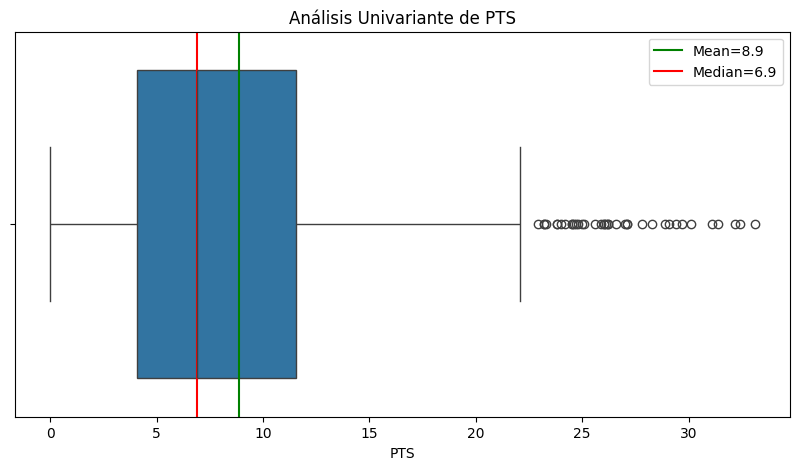

In [22]:
eda = Eda()
eda.univariante_analysis(df, 'PTS')

 La gráfica sugiere una distribución sesgada hacia la derecha. Esto significa que hay jugadores que anotan muchos más puntos que la mayoría, posiblemente estrellas del equipo, la distribución de los puntos tiene una cantidad significativa de datos atípicos, indicados por los puntos individuales a la derecha del gráfico. Estos datos atípicos representan jugadores que anotan muchos más puntos por partido que sus compañeros. 

 El hecho de que haya jugadores con puntajes muy por encima de la media puede indicar una alta efectividad en los tiros. Si estos jugadores con altos PTS también tienen altos porcentajes en estas estadísticas de tiro, apoyaría la hipótesis de que la efectividad en los tiros está correlacionada con un mayor rendimiento.

 Por ello identificaremos que jugadores representan estos datos atípicos. 

In [23]:
Q1 = df['PTS'].quantile(0.25)
Q3 = df['PTS'].quantile(0.75)
IQR = Q3 - Q1

# Definiendo límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificación de outliers
outliers = df[(df['PTS'] < lower_bound) | (df['PTS'] > upper_bound)]

# Mostrando los outliers detectados
print(outliers)

      Rk                   Player    Pos  Age   Tm   G  GS    MP    FG   FGA  \
12    11    Giannis Antetokounmpo     PF   28  MIL  63  63  32.1  11.2  20.3   
24    21              LaMelo Ball     PG   21  CHO  36  36  35.2   8.2  20.0   
44    35             Bradley Beal     SG   29  WAS  50  50  33.5   8.9  17.6   
66    49             Devin Booker     SG   26  PHO  53  53  34.6   9.9  20.1   
79    58            Mikal Bridges     SF   26  BRK  27  27  34.2   8.9  18.6   
85    64             Jaylen Brown     SF   26  BOS  67  67  35.9  10.1  20.6   
92    69            Jalen Brunson     PG   26  NYK  68  68  35.0   8.6  17.6   
100   75             Jimmy Butler     SF   33  MIA  64  64  33.4   7.5  13.9   
139  108            Stephen Curry     PG   34  GSW  56  56  34.7  10.0  20.2   
141  110            Anthony Davis      C   29  LAL  56  54  34.0   9.7  17.2   
150  117            DeMar DeRozan     SF   33  CHI  74  74  36.2   8.9  17.6   
160  125              Luka Don?i?     PG

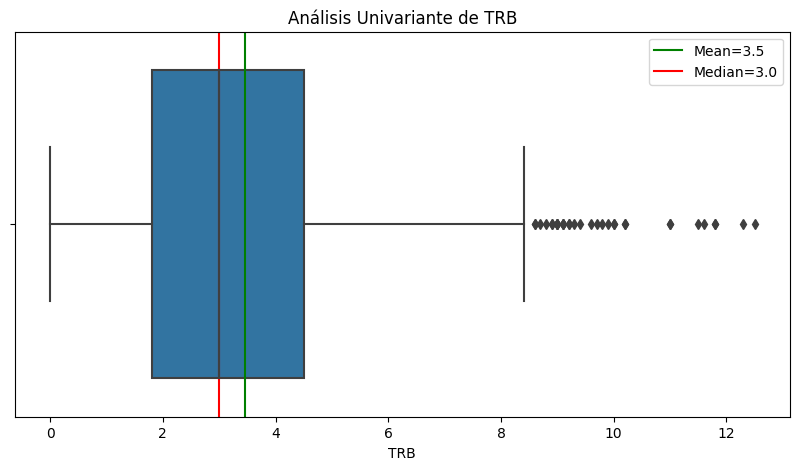

In [38]:
eda = Eda()
eda.univariante_analysis(df, 'TRB')

En la gráfica se observa un sesgo leve hacia la derecha en la distribución de TRB. Esto indica que, mientras la mayoría de los jugadores tiene un número de rebotes cercano a la mediana, hay algunos jugadores que obtienen significativamente más rebotes por partido.  Por lo tanto, un mayor número de TRB podría correlacionarse indirectamente con un mejor rendimiento del equipo, lo que afirma el hecho de incluirse para medir el rendimiento.  

Se observan varios datos atípicos en el lado derecho del boxplot. Estos representan jugadores que logran obtener un número de rebotes por partido mucho mayor que el promedio de sus compañeros. Por lo tanto, de nuevo se extraen quienes representan los datos atípicos. 

In [39]:
Q1 = df['TRB'].quantile(0.25)
Q3 = df['TRB'].quantile(0.75)
IQR = Q3 - Q1

# Definiendo límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificación de outliers
outliers = df[(df['TRB'] < lower_bound) | (df['TRB'] > upper_bound)]

# Mostrando los outliers detectados
print(outliers)

      Rk                 Player Pos  Age   Tm   G  GS    MP    FG   FGA  \
1      2           Steven Adams   C   29  MEM  42  42  27.0   3.7   6.3   
2      3            Bam Adebayo   C   25  MIA  75  75  34.6   8.0  14.9   
9      8          Jarrett Allen   C   24  CLE  68  68  32.6   5.9   9.2   
12    11  Giannis Antetokounmpo  PF   28  MIL  63  63  32.1  11.2  20.3   
20    17          Deandre Ayton   C   24  PHO  67  67  30.4   7.8  13.2   
106   81           Clint Capela   C   28  ATL  65  63  26.6   5.4   8.2   
109   84     Wendell Carter Jr.   C   23  ORL  57  54  29.6   5.6  10.8   
123   94            Nic Claxton   C   23  BRK  76  76  29.9   5.4   7.7   
141  110          Anthony Davis   C   29  LAL  56  54  34.0   9.7  17.2   
160  125            Luka Don?i?  PG   23  DAL  66  66  36.2  10.9  22.0   
177  138            Jalen Duren   C   19  DET  67  31  24.9   3.9   5.9   
184  143            Joel Embiid   C   28  PHI  66  66  34.6  11.0  20.1   
212  167            Rudy 

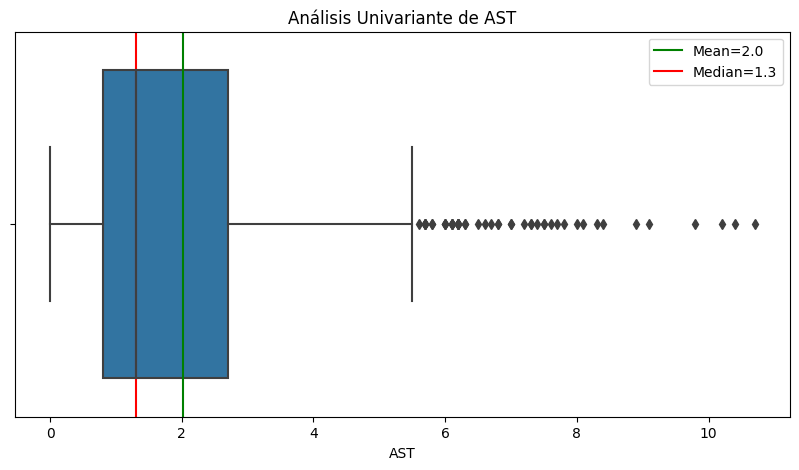

In [40]:
eda = Eda()
eda.univariante_analysis(df, 'AST')

Se observa un sesgo positivo en la distribución de las asistencias por partido.
Este sesgo sugiere que hay unos pocos jugadores que están realizando muchas más asistencias que la mayoría, lo que eleva la media de asistencias. 

Hay una cantidad notable de datos atípicos en el lado derecho del boxplot. Estos representan jugadores que proporcionan muchas más asistencias que sus compañeros de equipo.

 Este gráfico podría apoyar la hipótesis de que la posición influye en el rendimiento. Se espera que las posiciones que tradicionalmente manejan más el balón, como el base, tengan un número más alto de asistencias.

Se reliza detección de datos atípicos. 

In [42]:
Q1 = df['AST'].quantile(0.25)
Q3 = df['AST'].quantile(0.75)
IQR = Q3 - Q1

# Definiendo límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificación de outliers
outliers = df[(df['AST'] < lower_bound) | (df['AST'] > upper_bound)]

# Mostrando los outliers detectados
print(outliers)

      Rk                 Player Pos  Age   Tm   G  GS    MP    FG   FGA  \
12    11  Giannis Antetokounmpo  PF   28  MIL  63  63  32.1  11.2  20.3   
24    21            LaMelo Ball  PG   21  CHO  36  36  35.2   8.2  20.0   
92    69          Jalen Brunson  PG   26  NYK  68  68  35.0   8.6  17.6   
128   99            Mike Conley  PG   35  TOT  67  66  30.3   3.9   9.1   
129   99            Mike Conley  PG   35  UTA  43  42  29.7   3.6   8.7   
137  106        Cade Cunningham  PG   21  DET  12  12  33.3   7.8  18.7   
139  108          Stephen Curry  PG   34  GSW  56  56  34.7  10.0  20.2   
156  123      Spencer Dinwiddie  PG   29  TOT  79  79  34.5   5.8  13.3   
158  123      Spencer Dinwiddie  PG   29  BRK  26  26  35.3   5.5  13.7   
160  125            Luka Don?i?  PG   23  DAL  66  66  36.2  10.9  22.0   
173  136              Kris Dunn  PG   28  UTA  22   3  25.8   5.3   9.8   
198  153           De'Aaron Fox  PG   25  SAC  73  73  33.4   9.3  18.2   
199  154         Markelle

De los datos atípicos detectados, se resalta que en las asistencias la posición que más las realiza es la (PG) Base, quien dirige el ataque del equipo, manejando el balón y asegurándose de que llegue al jugador correcto en el momento adecuado, lo cual tiene coherencia con los resultados. 

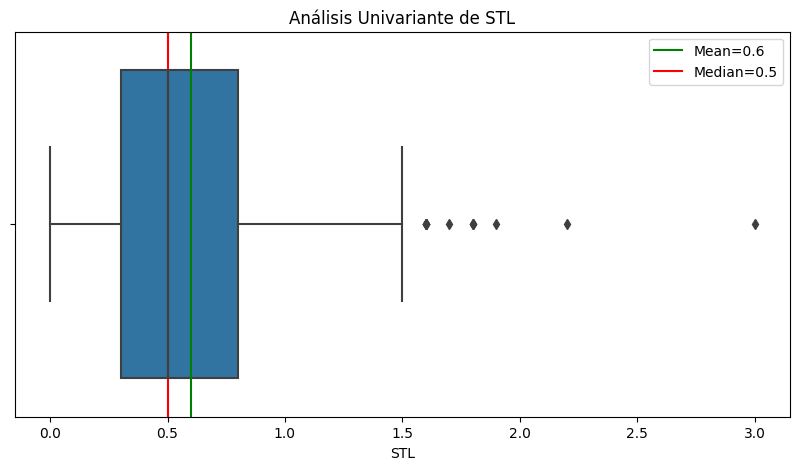

In [41]:
eda = Eda()
eda.univariante_analysis(df, 'STL')

En la gráfica de robos por partidos la distribución no está fuertemente sesgada y la mayoría de los jugadores tienen un número de robos por partido cerca de la mediana. 

Este gráfico puede respaldar la idea de que ciertas posiciones, como la del base, que suelen estar más involucrados en la defensa del perímetro, podrían tener más robos.

Se observan algunos datos atípicos a la derecha del boxplot. Estos valores representan jugadores que consiguen más robos por partido de lo normal, lo que podría indicar jugadores con habilidades defensivas excepcionales, se procede a identificar casos atípicos. 

In [44]:
Q1 = df['STL'].quantile(0.25)
Q3 = df['STL'].quantile(0.75)
IQR = Q3 - Q1

# Definiendo límites para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identificación de outliers
outliers = df[(df['STL'] < lower_bound) | (df['STL'] > upper_bound)]

# Mostrando los outliers detectados
print(outliers)

      Rk                   Player Pos  Age   Tm   G  GS    MP    FG   FGA  \
15    14               OG Anunoby  SF   25  TOR  67  67  35.6   6.3  13.2   
100   75             Jimmy Butler  SF   33  MIA  64  64  33.4   7.5  13.9   
179  140          Anthony Edwards  SG   21  MIN  79  79  36.0   8.9  19.5   
209  164  Shai Gilgeous-Alexander  PG   24  OKC  68  68  35.5  10.4  20.3   
211  166            Jacob Gilyard  PG   24  MEM   1   0  41.0   1.0   3.0   
239  186        Tyrese Haliburton  PG   22  IND  56  56  33.6   7.4  15.0   
253  198       Shaquille Harrison  SG   29  POR   5   0  24.0   3.0   7.2   
324  253            Herbert Jones  SF   24  NOP  66  66  29.6   3.6   7.6   
418  329        De'Anthony Melton  PG   24  PHI  77  58  27.9   3.6   8.5   
602  473         Matisse Thybulle  SG   25  POR  22  22  27.7   2.7   6.2   
610  479           Gary Trent Jr.  SG   24  TOR  66  44  32.1   6.1  14.2   
618  485            Fred VanVleet  PG   28  TOR  69  69  36.7   6.3  16.1   

En la identificación no se observa un número significativo de datos atípicos, lo que da respuesta a que pertence a jugadores con habilidades excpecionales en la defensa. 

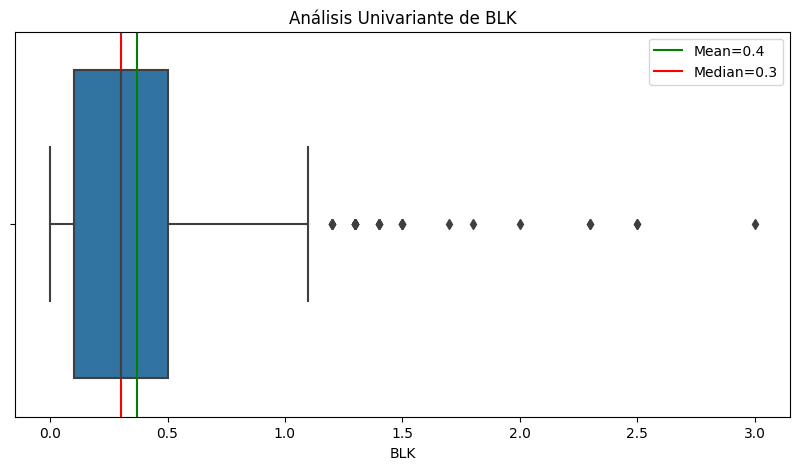

In [43]:
eda = Eda()
eda.univariante_analysis(df, 'BLK')

La gráfica muestra una proximidad de la media y la mediana sugiere que la distribución de los tapones por partido es relativamente simétrica con una ligera cola hacia la derecha debido a algunos valores más altos.  Que indican que hay jugadores que consiguen significativamente más tapones que el promedio.

 Este gráfico podría apoyar la hipótesis de que la posición afecta al rendimiento. Los jugadores que son responsables de proteger el aro (generalmente pívots y ala-pívots) son más propensos a tener un mayor número de BLK.

Esta variable es clave para evaluar la eficiencia en la anotación y es fundamental para la hipótesis que relaciona la eficiencia de tiro (medida por FG%, 2P%, 3P%, eFG%, FT%) con el rendimiento global.

Los datos atípicos en esta gráfica son importantes para la evaluación del rendimiento defensivo, procedemos a la detención de los mismos. 

In [45]:
Q1 = df['BLK'].quantile(0.25)
Q3 = df['BLK'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['BLK'] < lower_bound) | (df['BLK'] > upper_bound)]


print(outliers)

      Rk              Player    Pos  Age   Tm   G  GS    MP    FG   FGA  \
9      8       Jarrett Allen      C   24  CLE  68  68  32.6   5.9   9.2   
60    43     Bismack Biyombo      C   30  PHO  61  14  14.3   2.0   3.4   
64    47             Bol Bol     PF   23  ORL  70  33  21.5   3.7   6.8   
106   81        Clint Capela      C   28  ATL  65  63  26.6   5.4   8.2   
123   94         Nic Claxton      C   23  BRK  76  76  29.9   5.4   7.7   
141  110       Anthony Davis      C   29  LAL  56  54  34.0   9.7  17.2   
174  137        Kevin Durant  PF-SF   34  TOT  47  47  35.6  10.3  18.3   
175  137        Kevin Durant     PF   34  BRK  39  39  36.0  10.5  18.8   
176  137        Kevin Durant     SF   34  PHO   8   8  33.6   9.1  16.0   
184  143         Joel Embiid      C   28  PHI  66  66  34.6  11.0  20.1   
185  144        Drew Eubanks      C   25  POR  78  28  20.3   2.7   4.3   
201  156      Daniel Gafford      C   24  WAS  78  47  20.6   3.7   5.1   
212  167         Rudy Gob

En la identificación de los datos atípicos se observa una coherencia, en las posiciones que generan más tapones en este caso (C) el pivot que se especializa en bloquear tiros, capturar rebotes y anotar cerca del aro. Lo que muestra que estos datos no son errores en los datos, sino rendimientos excepcionales en esa posición. 

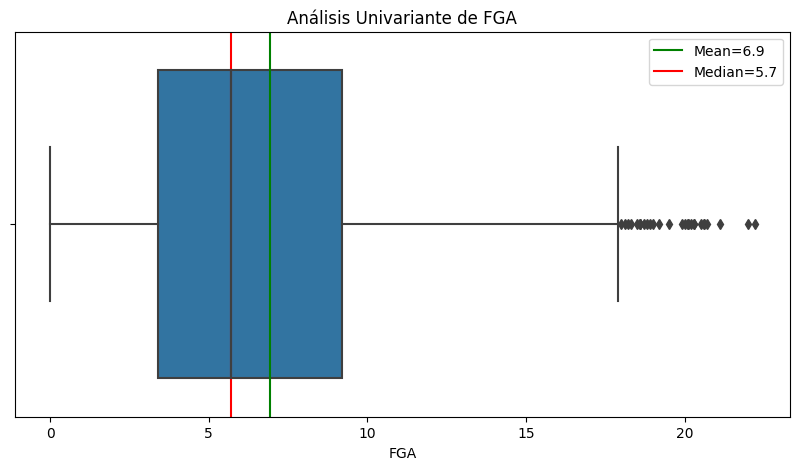

In [46]:
eda = Eda()
eda.univariante_analysis(df, 'FGA')

Se observa que la media (Mean = 6.9) es mayor que la mediana (Median = 5.7), lo cual indica un sesgo hacia la derecha en la distribución de FGA. Esto sugiere que hay jugadores que están tomando muchos más tiros que la mayoría y son datos atípicos. 

Esta gráfica contribuye al  analisis  de la relación entre FGA y los porcentajes de tiro para ver si los jugadores que disparan más son también aquellos que anotan con mayor eficiencia.

Se realiza la identificación de datos atípicos: 

In [51]:
Q1 = df['FGA'].quantile(0.25)
Q3 = df['FGA'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['FGA'] < lower_bound) | (df['FGA'] > upper_bound)]

print(outliers)

      Rk                   Player    Pos  Age   Tm   G  GS    MP    FG   FGA  \
12    11    Giannis Antetokounmpo     PF   28  MIL  63  63  32.1  11.2  20.3   
24    21              LaMelo Ball     PG   21  CHO  36  36  35.2   8.2  20.0   
66    49             Devin Booker     SG   26  PHO  53  53  34.6   9.9  20.1   
79    58            Mikal Bridges     SF   26  BRK  27  27  34.2   8.9  18.6   
85    64             Jaylen Brown     SF   26  BOS  67  67  35.9  10.1  20.6   
137  106          Cade Cunningham     PG   21  DET  12  12  33.3   7.8  18.7   
139  108            Stephen Curry     PG   34  GSW  56  56  34.7  10.0  20.2   
160  125              Luka Don?i?     PG   23  DAL  66  66  36.2  10.9  22.0   
174  137             Kevin Durant  PF-SF   34  TOT  47  47  35.6  10.3  18.3   
175  137             Kevin Durant     PF   34  BRK  39  39  36.0  10.5  18.8   
179  140          Anthony Edwards     SG   21  MIN  79  79  36.0   8.9  19.5   
184  143              Joel Embiid      C

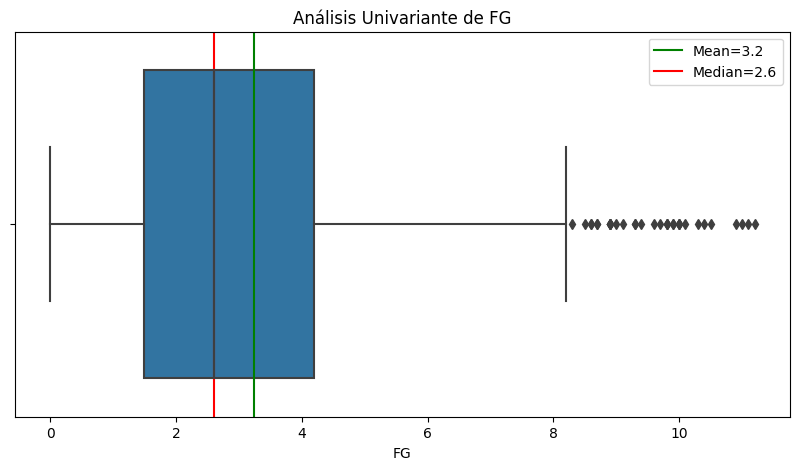

In [49]:
eda = Eda()
eda.univariante_analysis(df, 'FG')

 La gráfica se muestra un sesgo hacia la derecha en la distribución de FG. Esto sugiere que, aunque la mayoría de los jugadores anotan cerca de 2.6 canastas por partido, hay algunos que anotan significativamente más, lo que eleva la media.

  La cantidad de canastas anotadas (FG) está directamente relacionada con la efectividad en los tiros. Los jugadores que tienen un alto FG y también mantienen buenos porcentajes de tiro probablemente son jugadores de alto rendimiento. Esto apoyaría la hipótesis de que una alta efectividad de tiro está asociada con un buen rendimiento.

  Se identifican datos atípicos. 

In [50]:
Q1 = df['FG'].quantile(0.25)
Q3 = df['FG'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['FG'] < lower_bound) | (df['FG'] > upper_bound)]

print(outliers)

      Rk                   Player    Pos  Age   Tm   G  GS    MP    FG   FGA  \
12    11    Giannis Antetokounmpo     PF   28  MIL  63  63  32.1  11.2  20.3   
44    35             Bradley Beal     SG   29  WAS  50  50  33.5   8.9  17.6   
66    49             Devin Booker     SG   26  PHO  53  53  34.6   9.9  20.1   
79    58            Mikal Bridges     SF   26  BRK  27  27  34.2   8.9  18.6   
85    64             Jaylen Brown     SF   26  BOS  67  67  35.9  10.1  20.6   
92    69            Jalen Brunson     PG   26  NYK  68  68  35.0   8.6  17.6   
139  108            Stephen Curry     PG   34  GSW  56  56  34.7  10.0  20.2   
141  110            Anthony Davis      C   29  LAL  56  54  34.0   9.7  17.2   
150  117            DeMar DeRozan     SF   33  CHI  74  74  36.2   8.9  17.6   
160  125              Luka Don?i?     PG   23  DAL  66  66  36.2  10.9  22.0   
174  137             Kevin Durant  PF-SF   34  TOT  47  47  35.6  10.3  18.3   
175  137             Kevin Durant     PF

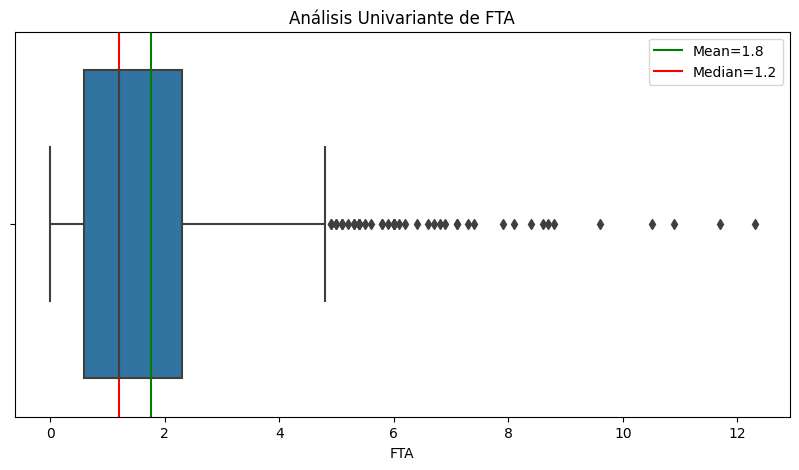

In [52]:
eda = Eda()
eda.univariante_analysis(df, 'FTA')

En el gráfico se observa que la media (Mean = 1.8) es mayor que la mediana (Median = 1.2), lo que sugiere un sesgo hacia la derecha en la distribución de FTA. Esto puede indicar que hay algunos jugadores que van a la línea de tiros libres con más frecuencia que la mayoría. 

Anexo la cantidad de FTA está relacionada con la efectividad de los tiros libres (FT%). Los jugadores con un alto número de FTA que también tienen un alto porcentaje de FT% pueden ser vistos como jugadores efectivos, lo que contribuiría al rendimiento.

Existen varios datos atípicos en el lado derecho del gráfico, procedemos a identificar a que jugadores corresponde.

In [53]:
Q1 = df['FTA'].quantile(0.25)
Q3 = df['FTA'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['FTA'] < lower_bound) | (df['FTA'] > upper_bound)]

print(outliers)

      Rk                   Player    Pos  Age   Tm   G  GS    MP    FG   FGA  \
2      3              Bam Adebayo      C   25  MIA  75  75  34.6   8.0  14.9   
12    11    Giannis Antetokounmpo     PF   28  MIL  63  63  32.1  11.2  20.3   
28    23           Paolo Banchero     PF   20  ORL  72  72  33.8   6.7  15.6   
32    27          Harrison Barnes     PF   30  SAC  82  82  32.5   4.6   9.6   
34    29               RJ Barrett     SG   22  NYK  73  73  33.9   7.0  16.1   
63    46         Bojan Bogdanovi?     PF   33  DET  59  59  32.1   7.3  14.9   
66    49             Devin Booker     SG   26  PHO  53  53  34.6   9.9  20.1   
79    58            Mikal Bridges     SF   26  BRK  27  27  34.2   8.9  18.6   
85    64             Jaylen Brown     SF   26  BOS  67  67  35.9  10.1  20.6   
92    69            Jalen Brunson     PG   26  NYK  68  68  35.0   8.6  17.6   
100   75             Jimmy Butler     SF   33  MIA  64  64  33.4   7.5  13.9   
139  108            Stephen Curry     PG

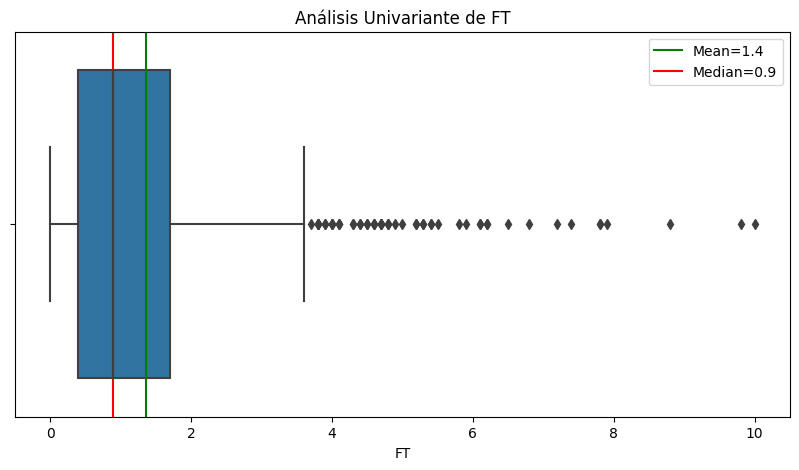

In [54]:
eda = Eda()
eda.univariante_analysis(df, 'FT')

Este tipo de distribución sugiere que hay algunos jugadores que anotan más tiros libres que la mayoría, lo que eleva la media.  Los FT son una medida directa de efectividad en una faceta del juego, y un alto número de FT anotados sugiere una buena eficacia en esta área. Los jugadores que tienen un alto número de FT y también un alto FT% probablemente contribuyen positivamente al rendimiento de su equipo.

In [55]:
Q1 = df['FT'].quantile(0.25)
Q3 = df['FT'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['FT'] < lower_bound) | (df['FT'] > upper_bound)]

print(outliers)

      Rk                   Player    Pos  Age   Tm   G  GS    MP    FG   FGA  \
2      3              Bam Adebayo      C   25  MIA  75  75  34.6   8.0  14.9   
12    11    Giannis Antetokounmpo     PF   28  MIL  63  63  32.1  11.2  20.3   
28    23           Paolo Banchero     PF   20  ORL  72  72  33.8   6.7  15.6   
32    27          Harrison Barnes     PF   30  SAC  82  82  32.5   4.6   9.6   
34    29               RJ Barrett     SG   22  NYK  73  73  33.9   7.0  16.1   
44    35             Bradley Beal     SG   29  WAS  50  50  33.5   8.9  17.6   
63    46         Bojan Bogdanovi?     PF   33  DET  59  59  32.1   7.3  14.9   
66    49             Devin Booker     SG   26  PHO  53  53  34.6   9.9  20.1   
77    58            Mikal Bridges     SF   26  TOT  83  83  35.7   7.1  15.3   
79    58            Mikal Bridges     SF   26  BRK  27  27  34.2   8.9  18.6   
85    64             Jaylen Brown     SF   26  BOS  67  67  35.9  10.1  20.6   
92    69            Jalen Brunson     PG

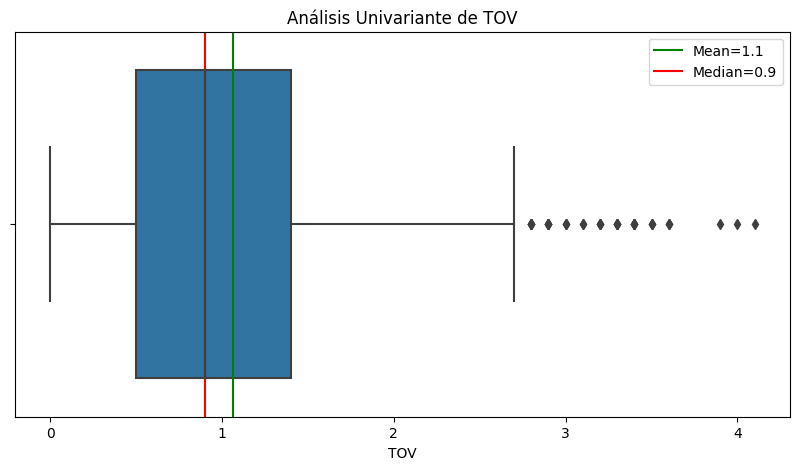

In [56]:
eda = Eda()
eda.univariante_analysis(df, 'TOV')

La media (Mean = 1.1) es ligeramente superior a la mediana (Median = 0.9), lo que sugiere un sesgo leve hacia la derecha en la distribución de TOV. Esto puede indicar que, aunque la mayoría de los jugadores tienen un número de pérdidas cercano a la mediana, hay algunos jugadores que cometen más pérdidas que otros. 

Aunque los TOV no están directamente relacionados con la efectividad de los tiros, sí afectan la eficiencia ofensiva de un jugador. Los jugadores que mantienen un bajo número de TOV mientras tienen una alta efectividad en los tiros podrían ser considerados más eficientes y, por tanto, tener un mejor rendimiento.

Identificamos que jugadores presentan mas perdidas de balón. 

In [57]:
Q1 = df['TOV'].quantile(0.25)
Q3 = df['TOV'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['TOV'] < lower_bound) | (df['TOV'] > upper_bound)]

print(outliers)

      Rk                   Player    Pos  Age   Tm   G  GS    MP    FG   FGA  \
12    11    Giannis Antetokounmpo     PF   28  MIL  63  63  32.1  11.2  20.3   
24    21              LaMelo Ball     PG   21  CHO  36  36  35.2   8.2  20.0   
28    23           Paolo Banchero     PF   20  ORL  72  72  33.8   6.7  15.6   
44    35             Bradley Beal     SG   29  WAS  50  50  33.5   8.9  17.6   
85    64             Jaylen Brown     SF   26  BOS  67  67  35.9  10.1  20.6   
122   93          Jordan Clarkson     SG   30  UTA  61  61  32.6   7.5  16.9   
137  106          Cade Cunningham     PG   21  DET  12  12  33.3   7.8  18.7   
139  108            Stephen Curry     PG   34  GSW  56  56  34.7  10.0  20.2   
160  125              Luka Don?i?     PG   23  DAL  66  66  36.2  10.9  22.0   
174  137             Kevin Durant  PF-SF   34  TOT  47  47  35.6  10.3  18.3   
175  137             Kevin Durant     PF   34  BRK  39  39  36.0  10.5  18.8   
179  140          Anthony Edwards     SG

De lo realizado anteriormente, hemos identificado la distribución de cada variable que compone la metrica del rendiminento (EFF). Y se observo los siguientes resultados generales:

- Hay sesgo a la derecha en todas las variables que podrían afectar la valoración general del rendimiento. Una variable que tiene muchos valores extremos (outliers), podría influir desproporcionadamente en la puntuación total de EFF.

- A partir de la forma de las variables resulta importante más adelante revisar la distribución normal de cada variable puede observar si se cumplen estos supuestos o si se necesitan transformaciones o métodos estadísticos alternativos.

- Nos ha permitido revisar si es necesario la corrección de Datos Atípicos, los cuales podrían representar errores de medición o situaciones excepcionales que no deberían influir indebidamente en la métrica de eficiencia. Se han considerado como jugadores excpecionales que contribuyen al juego a partir del rol y la posición que tienen. 

A continuación, se proporciona una serie de histogramas que representan la distribución del resto de  variables estadísticas claves en las hipótesis planteadas se observara  Age (Edad), Mp (Minutos jugados), G (Partidos jugados), GS (Partidos iniciados),  2p%,  3P%, eFG% (Alta eficiencia de tiro suele ser indicativa de un buen rendimiento tanto a nivel individual como de equipo), FG%, Ft%. 

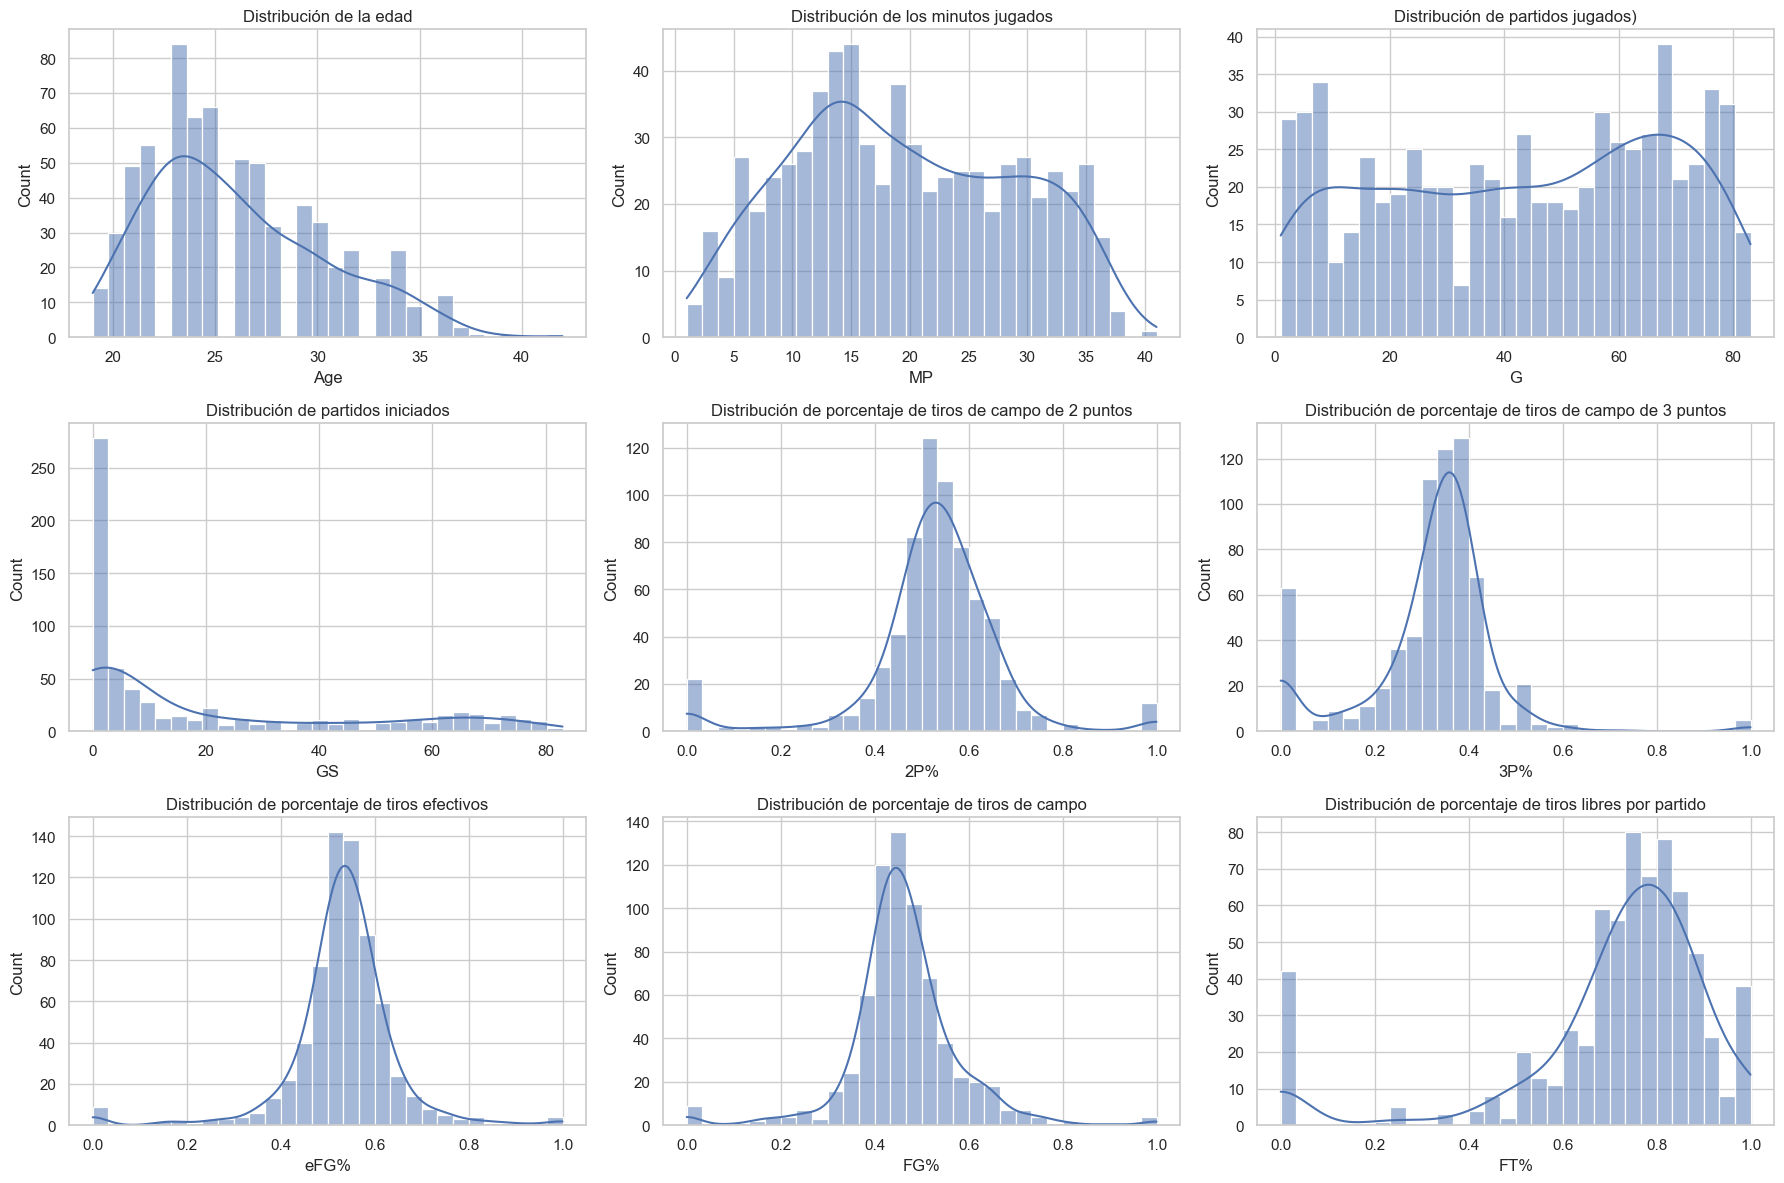

In [60]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(3, 3, figsize=(18, 12))

sns.histplot(df['Age'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribución de la edad')

sns.histplot(df['MP'], bins=30, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Distribución de los minutos jugados')


sns.histplot(df['G'], bins=30, ax=axes[0, 2], kde=True)
axes[0, 2].set_title('Distribución de partidos jugados)')


sns.histplot(df['GS'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Distribución de partidos iniciados')


sns.histplot(df['2P%'], bins=30, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Distribución de porcentaje de tiros de campo de 2 puntos')


sns.histplot(df['3P%'], bins=30, ax=axes[1, 2], kde=True)
axes[1, 2].set_title('Distribución de porcentaje de tiros de campo de 3 puntos')

sns.histplot(df['eFG%'], bins=30, ax=axes[2, 0], kde=True)
axes[2, 0].set_title('Distribución de porcentaje de tiros efectivos')

sns.histplot(df['FG%'], bins=30, ax=axes[2, 1], kde=True)
axes[2, 1].set_title('Distribución de porcentaje de tiros de campo')

sns.histplot(df['FT%'], bins=30, ax=axes[2, 2], kde=True)
axes[2, 2].set_title('Distribución de porcentaje de tiros libres por partido')

plt.tight_layout()
plt.show()

- Distribución de la edad (Age):

La distribución parece ser ligeramente sesgada hacia la derecha, con una concentración de jugadores en el rango de 20 a 30 años, lo cual es típico en atletas profesionales.

Contribución a la hipótesis: Esto puede indicar que los jugadores más jóvenes son más prevalentes en la liga, pero no necesariamente que la edad es un factor importante en el rendimiento sin más contexto.

- Distribución de los minutos jugados (MP):

La distribución de MP parece ser aproximadamente normal, lo que indica una distribución equitativa de los minutos jugados entre los jugadores.

Contribución a la hipótesis: Un análisis más profundo podría revelar si los jugadores que juegan más minutos tienen un mayor rendimiento.

- Distribución de partidos jugados (G):

Los jugadores parecen participar en una cantidad variada de partidos, con algunas concentraciones alrededor de valores específicos, posiblemente relacionados con la duración de la temporada o lesiones.

Contribución a la hipótesis: Esto podría apoyar la idea de que la experiencia de juego (número de partidos disputados) influye en el rendimiento.

- Distribución de partidos iniciados (GS):

Hay una gran cantidad de jugadores con pocos o ningún partido iniciado, con un descenso progresivo en el número de jugadores a medida que aumenta el número de partidos iniciados.

Contribución a la hipótesis: Esto puede sugerir que solo algunos jugadores son constantemente titulares, lo cual podría estar relacionado con un mayor rendimiento.

- Distribución de porcentaje de tiros de campo de 2 puntos (2P%):

La distribución del 2P% parece tener una forma de campana, lo que indica una distribución normal. La mayoría de los jugadores tienen un porcentaje alrededor de un valor medio, con pocos extremos en ambos lados.

Contribución a la hipótesis: Esto apoya la idea de que la efectividad en los tiros es un componente crítico del rendimiento.

- Distribución de porcentaje de triples (3P%):

Similar al 2P%, la distribución de 3P% parece aproximadamente normal, aunque con una cola más larga hacia los valores más bajos, lo que sugiere que algunos jugadores tienen mucha menor efectividad en triples.

Contribución a la hipótesis: Indica que no todos los jugadores tienen la misma capacidad para anotar de triples, lo cual es un factor importante en el rendimiento.

- Distribución de porcentaje de tiros efectivos (eFG%):

La distribución de eFG% también sigue una distribución normal, con la mayoría de los jugadores concentrados alrededor del promedio.

Contribución a la hipótesis: Un eFG% alto es una buena indicación de rendimiento eficiente, apoyando la hipótesis de que la eficacia en la anotación es clave para el rendimiento general.

- Distribución de porcentaje de tiros de campo (FG%):

El FG% muestra una distribución normal, similar al eFG%, con la mayoría de los jugadores agrupados cerca del promedio.

Contribución a la hipótesis: Al igual que con eFG%, un alto FG% es indicativo de un rendimiento eficiente en tiros de campo.

- Distribución de porcentaje de tiros libres por partido (FT%):

La distribución de FT% parece ser aproximadamente normal, con una ligera inclinación hacia porcentajes más altos.

Contribución a la hipótesis: Esto sugiere que la mayoría de los jugadores son eficientes en tiros libres, lo cual contribuye al rendimiento general, especialmente en situaciones de juego cerrado.

Es importante considerar: 

- Distribución de Puntos por Juego (PTS):

Contribuye a la hipótesis de que los puntos efectivos (puntos por juego) son un indicador de rendimiento.

- Distribución de Asistencias (AST):

Apoya la hipótesis de que las asistencias por partido son un indicador de rendimiento, ya que implican una participación activa en la creación de oportunidades de anotación para el equipo.

- Distribución de Rebotes Totales (TRB):

Relaciona con la idea de que los rebotes totales por partido son un indicador de rendimiento, particularmente en la contribución de un jugador a la posesión del balón y la defensa.

- Distribución de Porcentaje de Tiro Efectivo (eFG%):

Directamente relevante para la hipótesis que relaciona un alto porcentaje de tiro efectivo con buen rendimiento, ya que considera el valor adicional de los triples.

- Distribución de Minutos por Juego (MP):

Se alinea con la hipótesis de que los minutos jugados afectan el rendimiento de los jugadores, posiblemente reflejando la confianza del entrenador y la resistencia del jugador.

- Distribución de Partidos Disputados (G):

Contribuye a la hipótesis de que el número de juegos jugados está relacionado con el rendimiento, potencialmente indicando la consistencia y la disponibilidad del jugador.

**A continuación nos centramos en conocer el comportamiento de la variable de posición (Pos).**

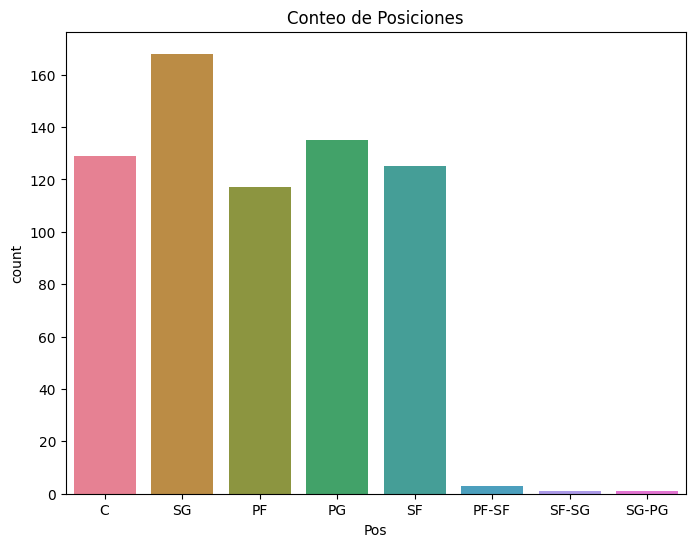

Conteo de valores:
Pos
SG       168
PG       135
C        129
SF       125
PF       117
PF-SF      3
SF-SG      1
SG-PG      1
Name: count, dtype: int64
Porcentaje de valores:
Pos
SG       24.742268
PG       19.882180
C        18.998527
SF       18.409426
PF       17.231222
PF-SF     0.441826
SF-SG     0.147275
SG-PG     0.147275
Name: proportion, dtype: float64


In [26]:
conteo = df['Pos'].value_counts()
porcentaje = df['Pos'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 6)) 
sns.countplot(x='Pos', data=df, hue='Pos', palette='husl', legend=False) 
plt.title('Conteo de Posiciones') 
plt.show() 

print("Conteo de valores:")
print(conteo)
print("Porcentaje de valores:")
print(porcentaje)


Las posiciones tradicionales C, SG, PF, PG, SF, (Pívot, Escolta, Ala-Pívot, Base, Alero) respectivamente, se puede observar que todas las posiciones tradicionales tienen representaciones similares en términos de conteo, aunque con ligeras variaciones en la cantidad.

Las barras etiquetadas como PF-SF, SF-SG, y SG-PG representan posiciones híbridas o combinadas. Esto refleja una tendencia moderna en el baloncesto donde los jugadores son más versátiles y pueden ocupar más de una posición en la cancha.

La distribución de las posiciones puede proporcionar una base para analizar cómo la posición específica o las posiciones combinadas afectan el rendimiento de los jugadores. 

Este gráfico es una herramienta útil para comenzar a explorar el rendimiento y cómo las diferentes posiciones están representadas. 

 **Finalmente, se analiza el comportamiento de la variable creada de rendimiento global (EFF)**

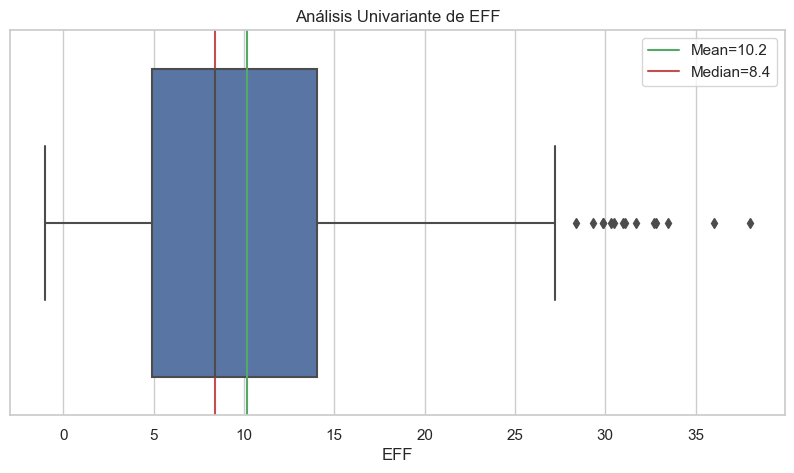

In [61]:
eda = Eda()
eda.univariante_analysis(df, 'EFF')

De la gráfica se resalta que dado que EFF es una combinación de estadísticas positivas (puntos, rebotes, asistencias, etc.) y negativas (tiros y tiros libres fallidos, pérdidas de balón), una distribución con sesgo hacia la derecha y datos atípicos podría respaldar la hipótesis de que la efectividad en los tiros está relacionada con un alto rendimiento.

 La presencia de datos atípicos puede sugerir que aquellos jugadores que tienen más tiempo en la cancha o que son titulares frecuentes tienen la oportunidad de acumular estadísticas que contribuyen positivamente a su EFF.

 Esta gráfica es un instrumento valioso para evaluar el rendimiento global de los jugadores y para identificar tanto el rendimiento típico como las excepciones destacables dentro de un conjunto de datos.

**7.2.Análisis bivariante**

A continuación se observa la relación entre dos variables, permitiendo  descubrir correlaciones entre variables que afecten el rendimiento y tendencia.

Se inicia observando la correlación entre algunas variables que miden la efectividad y el rendimiento.  

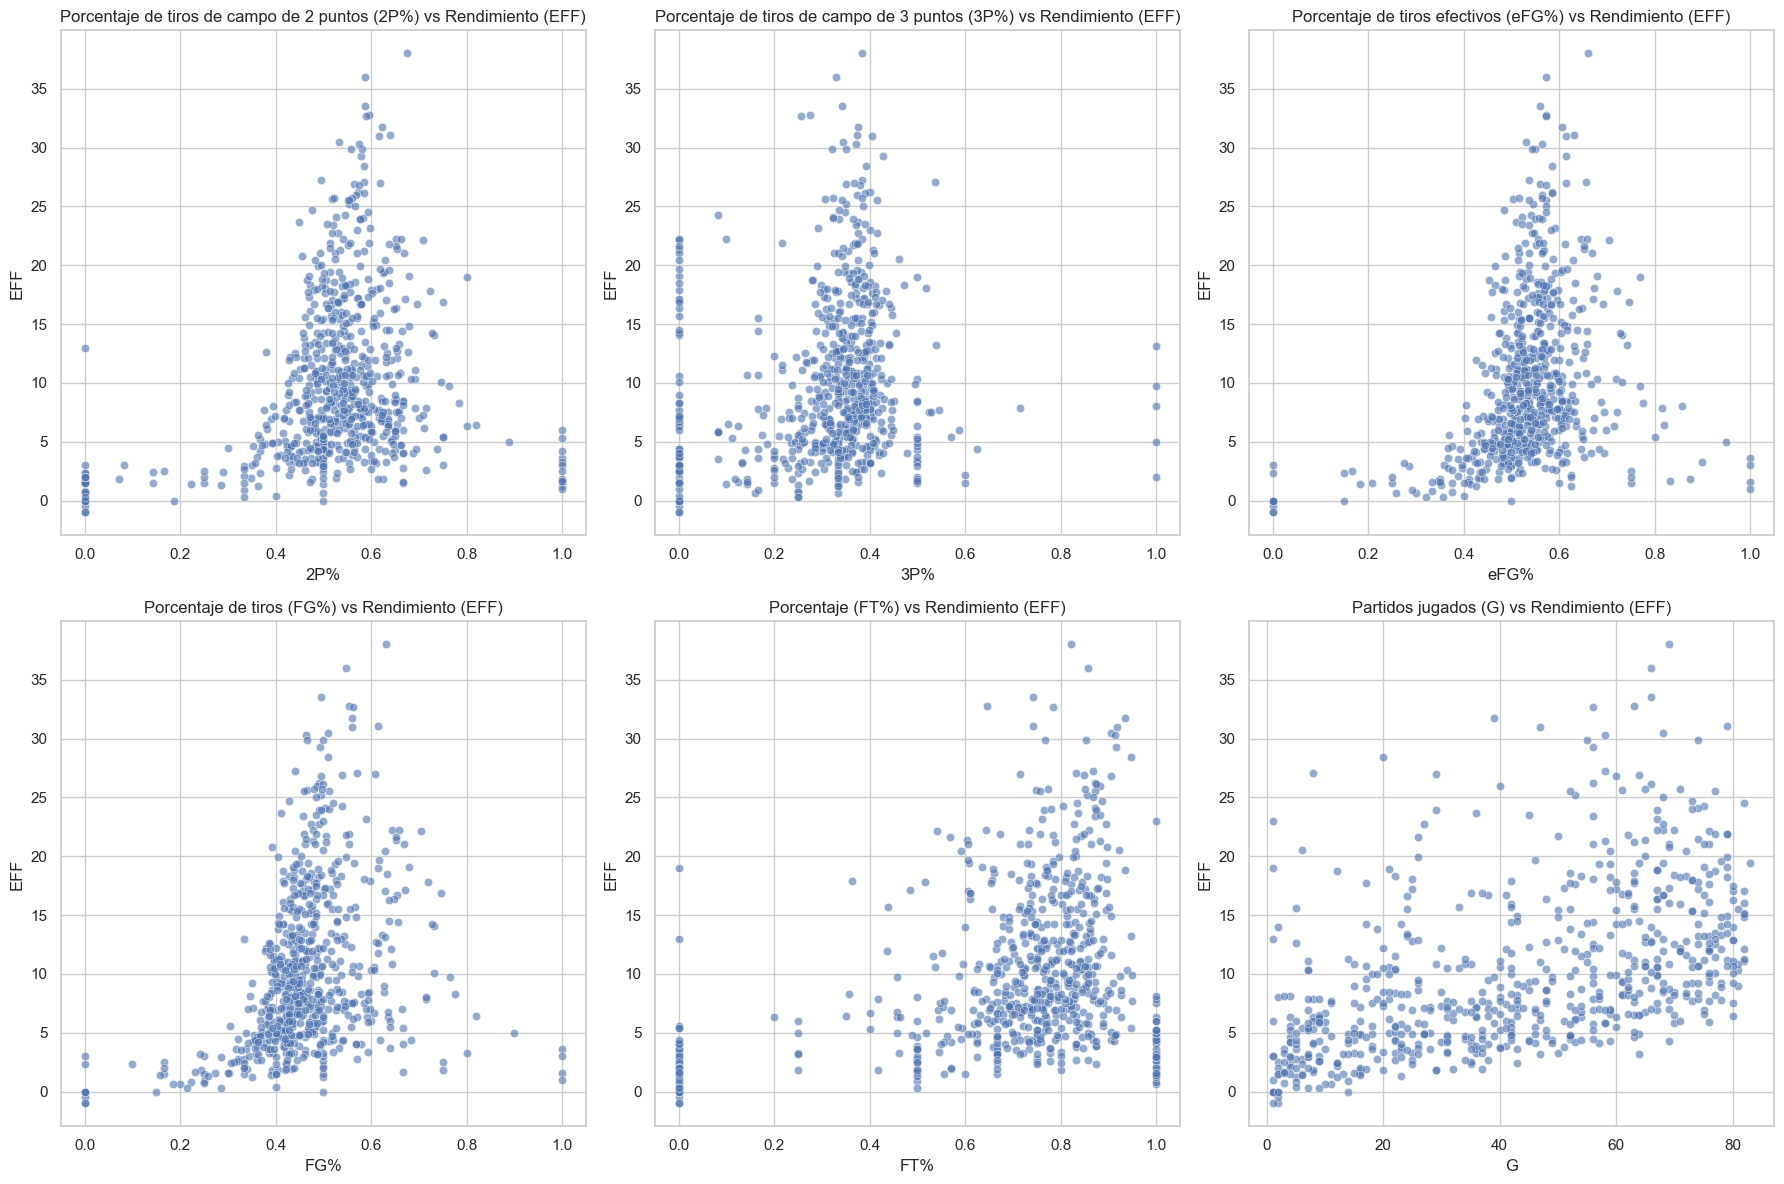

In [27]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

sns.scatterplot(data=df, x='2P%', y='EFF', alpha=0.6, ax=axes[0, 0])
axes[0, 0].set_title('Porcentaje de tiros de campo de 2 puntos (2P%) vs Rendimiento (EFF)')


sns.scatterplot(data=df, x='3P%', y='EFF', alpha=0.6, ax=axes[0, 1])
axes[0, 1].set_title('Porcentaje de tiros de campo de 3 puntos (3P%) vs Rendimiento (EFF)')


sns.scatterplot(data=df, x='eFG%', y='EFF', alpha=0.6, ax=axes[0, 2])
axes[0, 2].set_title('Porcentaje de tiros efectivos (eFG%) vs Rendimiento (EFF)')

sns.scatterplot(data=df, x='FG%', y='EFF', alpha=0.6, ax=axes[1, 0])
axes[1, 0].set_title('Porcentaje de tiros (FG%) vs Rendimiento (EFF)')

sns.scatterplot(data=df, x='FT%', y='EFF', alpha=0.6, ax=axes[1, 1])
axes[1, 1].set_title('Porcentaje (FT%) vs Rendimiento (EFF)')

sns.scatterplot(data=df, x='G', y='EFF', alpha=0.6, ax=axes[1, 2])
axes[1, 2].set_title('Partidos jugados (G) vs Rendimiento (EFF)')

plt.tight_layout() 
plt.show()



Podemos interpretar los siguientes resultados: 

- Porcentaje de tiros de campo de 2 puntos (2P%) vs Rendimiento (EFF):

Parece haber una tendencia positiva donde un mayor porcentaje de tiros de 2 puntos se asocia con un mayor EFF.
Esto sugiere que la eficiencia en tiros cercanos podría ser un indicador significativo del rendimiento general de un jugador.

- Porcentaje de tiros de campo de 3 puntos (3P%) vs Rendimiento (EFF):

La dispersión muestra una concentración de datos que indica una relación positiva, aunque menos pronunciada que para los tiros de 2 puntos, entre el 3P% y el EFF.
Esto podría indicar que mientras los tiros de 3 puntos son valiosos, no todos los jugadores con alto 3P% necesariamente tienen un alto rendimiento, posiblemente debido a la naturaleza de riesgo de estos tiros.

- Porcentaje de tiros efectivos (eFG%) vs Rendimiento (EFF):

La relación parece ser fuertemente positiva, lo que indica que el eFG%, que ajusta el porcentaje de tiros de campo para reflejar el valor extra de los tiros de 3 puntos, es un buen predictor del rendimiento.
Esto refuerza la idea de que la eficiencia general en tiros de campo es un componente clave del rendimiento de un jugador.

- Porcentaje de tiros de campo (FG%) vs Rendimiento (EFF):

El FG% también muestra una asociación positiva con el EFF, lo que respalda la importancia de la eficiencia de tiro en la valoración general del rendimiento de un jugador.

- Porcentaje de tiros libres (FT%) vs Rendimiento (EFF):

Los datos sugieren una tendencia positiva, aunque con bastante dispersión, lo que podría indicar que aunque los tiros libres son importantes, hay otros factores que también influyen significativamente en el rendimiento.

- Partidos jugados (G) vs Rendimiento (EFF):

La relación entre G y EFF no muestra una tendencia clara, lo que sugiere que simplemente jugar más partidos no garantiza un mayor rendimiento. Esto podría deberse a que el rendimiento depende de la calidad de las contribuciones en el juego, no solo de la cantidad.

Anexo a lo anterior revisamos en un gráfico a parte la relación entre el rendimiento y el inicio de partidos. 

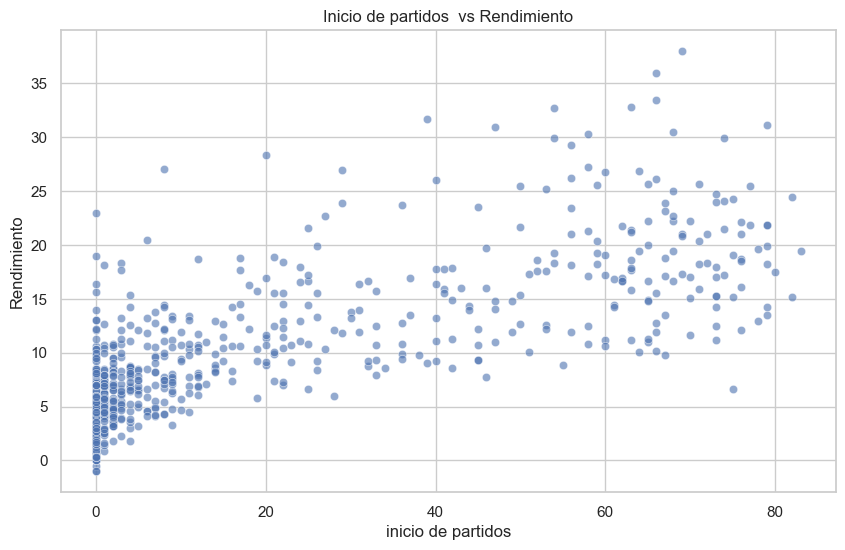

In [94]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='GS', y='EFF', alpha=0.6)
plt.title('Inicio de partidos  vs Rendimiento')
plt.xlabel('inicio de partidos')
plt.ylabel('Rendimiento')
plt.show()

De la gráfica resaltamos: 

- A primera vista, parece haber una correlación positiva leve entre el número de partidos iniciados y el rendimiento. Los jugadores que han iniciado más partidos tienden a tener un rendimiento ligeramente más alto, pero la tendencia no es fuertemente pronunciada.

- Los jugadores que han iniciado muchos partidos (a la derecha del gráfico) muestran una amplia gama de puntuaciones de rendimiento, lo que sugiere que ser titular frecuente no garantiza automáticamente un alto rendimiento.

- Hay una concentración de datos en el extremo inferior del eje X, lo que indica que muchos jugadores han iniciado pocos o ningún partido. Estos jugadores tienden a tener un rendimiento más bajo, pero aún hay una variabilidad considerable.

- Datos Atípicos:Hay algunos datos atípicos, en particular jugadores con rendimientos muy altos que no han iniciado muchos partidos. Estos casos podrían ser jugadores especialistas o que juegan minutos de alta calidad pero no necesariamente comienzan el juego.


- El gráfico podría apoyar la hipótesis de que los jugadores que son titulares más frecuentemente tienen un mayor rendimiento, pero también sugiere que hay más factores en juego, ya que no hay una relación directa y fuerte.

Aunque iniciar partidos puede estar relacionado con la experiencia, el gráfico indica que la experiencia por sí sola (en términos de partidos iniciados) no es un predictor infalible del rendimiento.

Ahora nos interesamos en conocer si existe relación del tiempo jugado y el rendimiento, como clave para el análisis. 

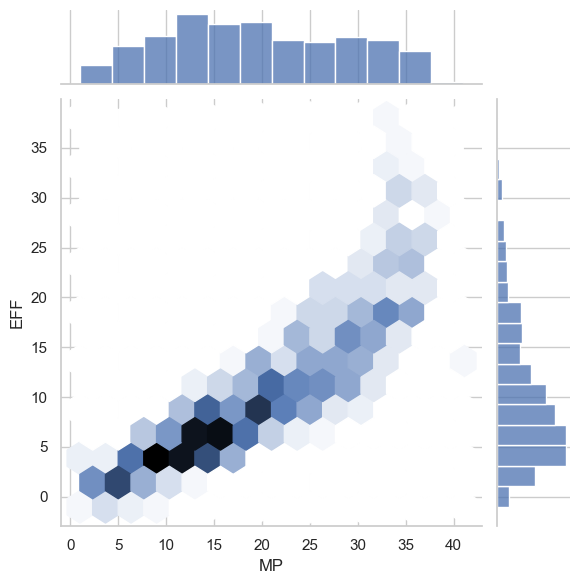

In [28]:
sns.jointplot(data=df, x='MP', y='EFF', kind='hex');

La gráfica nos muestra una correlación positiva entre los minutos jugados y la eficiencia, donde los jugadores con más minutos tienden a tener una mayor eficiencia. Esto se muestra por la concentración de hexágonos más oscuros que se extienden desde la parte inferior izquierda hacia la parte superior derecha del gráfico.

Los histogramas marginales sugieren que la mayoría de los jugadores juegan entre 20 y 30 minutos por partido y que la mayoría de los valores de eficiencia están entre 5 y 15.

Hay una notable concentración de jugadores en un rango medio de minutos jugados con eficiencias moderadas.

El gráfico apoya la hipótesis de que los jugadores que tienen más minutos en el juego tienden a tener un mayor rendimiento, medido por el EFF. Esto podría sugerir que los jugadores más talentosos o fundamentales para su equipo reciben más tiempo de juego y contribuyen más significativamente a las métricas de rendimiento.

El patrón observado en el gráfico puede indicar que no solo jugar más tiempo está asociado con un mayor rendimiento, sino que también puede ser un reflejo de una mayor oportunidad para contribuir en varias facetas del juego que componen la métrica EFF.

Teniendo en cuenta la importancia que nos mostro la variable posición en el análisis univariado, observamos como se distribuye en rendimiento en las diferentes posiciones. 

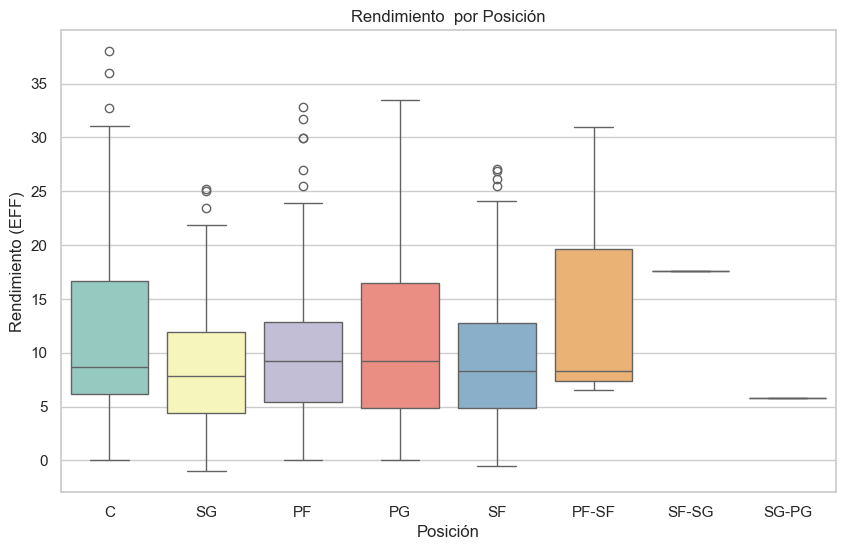

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Pos', y='EFF', hue='Pos', palette='Set3', legend=False)
plt.title('Rendimiento  por Posición')
plt.xlabel('Posición')
plt.ylabel('Rendimiento (EFF)')
plt.show()

El grafico nos muestra: 

- Las posiciones tradicionales (C, SG, PF, PG, SF) tienen rangos de rendimiento variados, con algunas posiciones mostrando una mayor dispersión que otras.

- Las posiciones híbridas (PF-SF, SF-SG, SG-PG) tienen una variabilidad de rendimiento que podría reflejar la versatilidad de las responsabilidades en la cancha.

- Las medianas varían entre las posiciones, lo que podría sugerir que ciertas posiciones tienen un mayor impacto en el rendimiento que otras, o que hay roles específicos dentro de un equipo que facilitan un mayor rendimiento estadístico.

Por lo tanto, este gráfico podría respaldar la hipótesis de que la posición afecta al rendimiento (EFF). Podría sugerir que ciertas posiciones están asociadas con un mayor rendimiento debido a sus roles en el campo, como más oportunidades para anotar, asistir o defender.

**Finalmente nos interesamos en conocer si la edad afecta al rendimiento de los jugadores, para ello se realiza una categorización de la variable edad, teniendo en cuenta la mediana de la variable.**

In [32]:
median_age = df['Age'].median()

df['Age_Cat'] = pd.cut(df['Age'],
                       bins=[df['Age'].min() - 1, median_age, df['Age'].max()],
                       labels=['Joven', 'Adulto'],
                       include_lowest=True)

Y a tráves de un diagrama de dispersión observamos la relación de los tiros efectivos y el rendimiento, teniendo en cuenta la clasificación de la edad. 

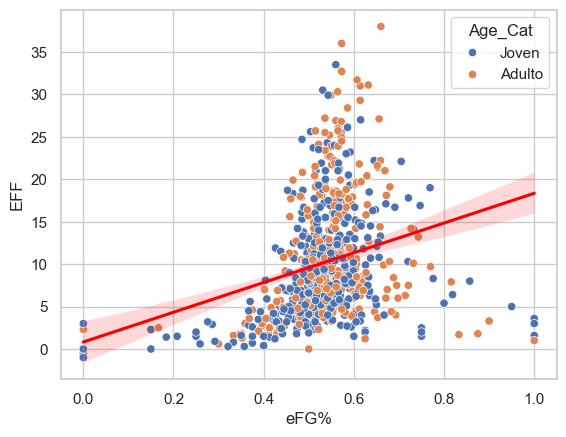

In [33]:
sns.scatterplot(data=df, x='eFG%', y='EFF', hue='Age_Cat')
sns.regplot(x='eFG%', y='EFF', data=df, scatter=False, color='red')

plt.show()



Del gráfico se observa: 

- Una correlación positiva entre eFG% y EFF, indicada por la línea de regresión ascendente. Esto significa que a medida que el eFG% aumenta, generalmente también lo hace el EFF.

- Diferencias por edad, los puntos están coloreados según la categoría de edad. A primera vista, no parece haber una clara división entre las categorías de 'Joven' y 'Adulto' en términos de su relación entre eFG% y EFF. Ambas categorías están dispersas a lo largo de la línea de regresión, lo que sugiere que la eficiencia en tiros de campo es un buen indicador de rendimiento independientemente de la edad.


Banda de Confianza:

- La banda de color rojo claro alrededor de la línea de regresión representa la banda de confianza, indicando el grado de incertidumbre alrededor de la estimación de la línea de regresión. La banda parece ser bastante estrecha, lo que sugiere que hay una fuerte confianza en la relación estimada entre eFG% y 
EFF.

- Concentración de Datos: La mayoría de los datos se concentran alrededor del rango medio de eFG%, con menos datos hacia los extremos más altos y bajos.


- Efectividad de Tiros y Rendimiento:

El gráfico refuerza la hipótesis de que una mayor efectividad en tiros de campo está asociada con un mayor rendimiento, como se refleja en la métrica EFF.

- Impacto de la Edad en el Rendimiento:

Si bien el gráfico no muestra una diferencia distintiva en el rendimiento basado en la edad, la superposición de las categorías en todo el rango de eFG% sugiere que la edad por sí sola no es un determinante claro del rendimiento en términos de la eficiencia de tiro. 

**7.3.Análisis multivariante**

Para finalizar proponemos la realización de una análisis multivariante a partir de una matriz de correlación que muestre que variables númericas presentan mejor asociación con el rendimiento (EFF)

**Análisis de Correlación**

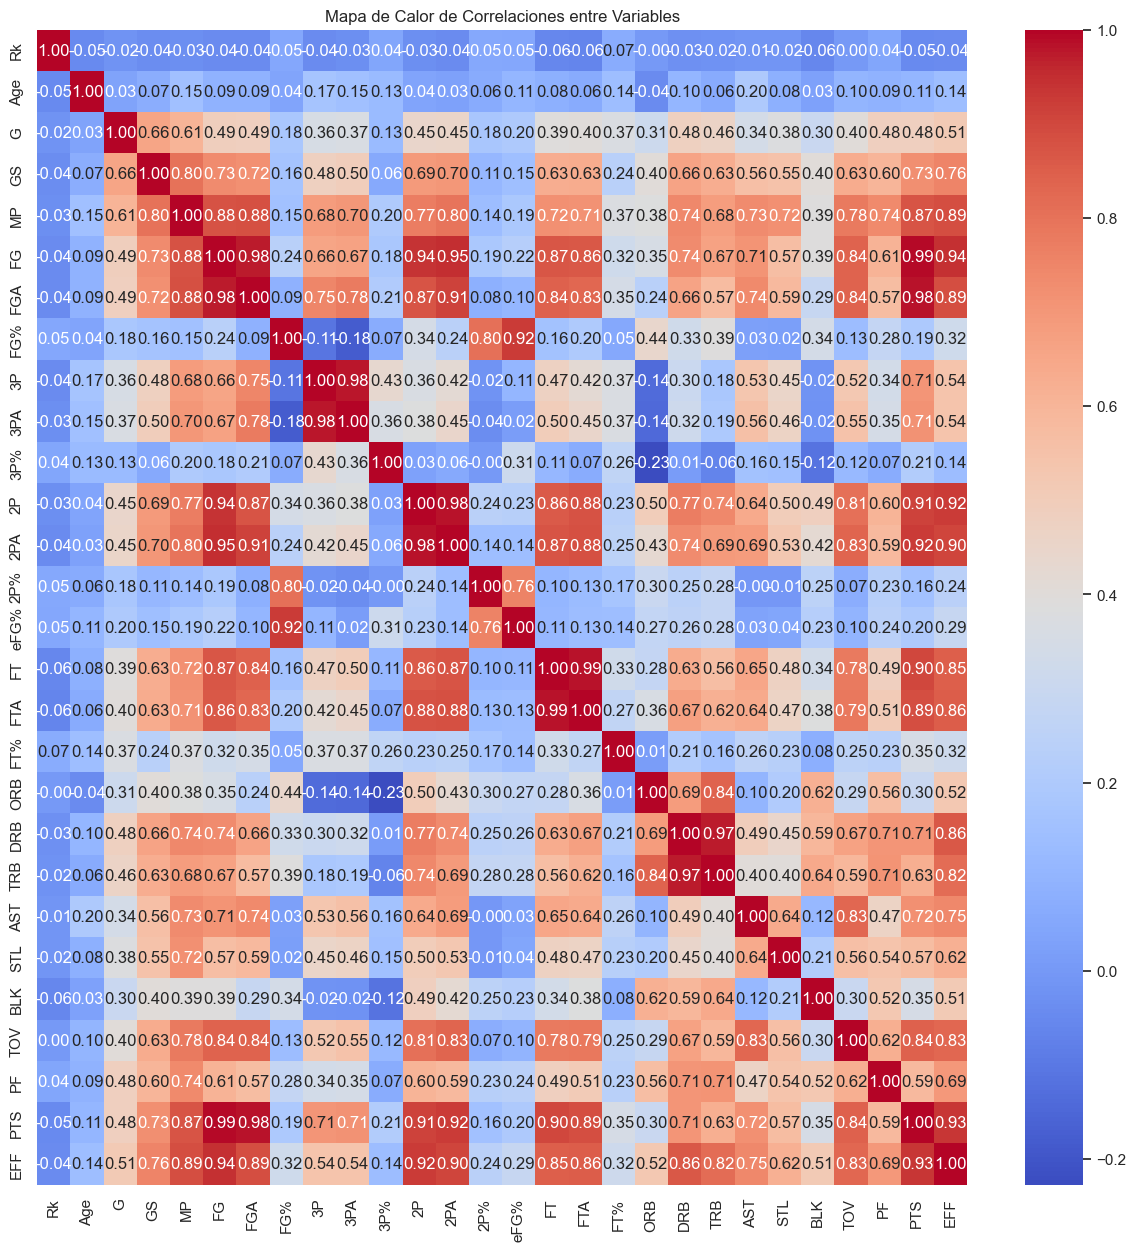

In [34]:
df_numeric = df.select_dtypes(include=[np.number])
correlation_matrix = df_numeric.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Mapa de Calor de Correlaciones entre Variables')
plt.show()

De la matriz de correlación confirmamos de manera objetiva la relación de ciertas variables con el rendimiento, resaltamos aquellas que no han sido consideradas con su relación. 

- GS y rendimiento = 0.76 
- MP y rendimiento= 0.89
- 2P y rendimiento = 0.92
- 2PA  y rendimiento= 0.90 
- DRB y rendimiento= 0.86

En resumen, estos coeficientes altos señalan que tanto la participación (en términos de minutos jugados y titularidades) como la contribución efectiva en el juego (a través de anotaciones y rebotes defensivos) están fuertemente vinculadas al rendimiento de un jugador.

Sin embargo, solo tomaremos los minutos jugados y los tiros de dos puntos para ser evaluados en un contraste de hipotesis en el rendimiento. 

Teniendo en cuenta todo el análisis realizado hasta ahora sobre el rendimiento de los jugadores se propone el desarrollo de las siguientes hipótesis. 

## Hipótesis Desarrollo

1. Rendimiento  y edad categorizada (joven, Mayor)
2. Rendimiento y posición
3. Minutos jugados y rendimiento 
4. 2P y rendimiento
5. Distribución de normalidad 

1. Rendimiento y Edad categorica ----> T de Student

**H0**: No hay evidencia significativa en rendimiento entre los diferentes grupos hetareos.

**H1**: Existe una diferencia significativa entre rendimiento entre diferentes grupos hetareos.

rendimiento Global Vs Posición ----> ANOVA

**H0**: No hay diferencias significativas en rendimiento  entre las diferentes posiciones de los jugadores

**H1** : Existe una diferencia significativa entre rendimiento   entre las diferentes posiciones de los jugadores

3. Minutos Vs rendimiento (EFF) ----> Correlación de Pearson

**H0**: No hay correlación entre los minutos jugados y el rendimiento

**H1**: Existe una diferencia significativa entre los minutos jugados y el rendimiento

4. Minutos Vs rendimiento (EFF) ----> Correlación de Pearson

**H0**: No hay correlación entre los tiros de dos puntos  y el rendimiento

**H1**: Existe una diferencia significativa entre los tiros de dos puntos  y el rendimiento

5. Normalidad ----> Shapiro-Wilk o D'Agostino's K-squared.

**H0**: La distribución de las columnas numéricas sigue una distribución normal.

**H1**: La distribución de las columnas numéricas NO sigue una distribución normal.

In [35]:
# 1.

p_h = df[df['Age_Cat']=='Joven']['EFF']
p_m = df[df['Age_Cat']=='Mayor']['EFF']

ttest = stats.ttest_ind(p_h, p_m)
ttest

if ttest[1] < 0.05:
    print('Rechazamos la hipótesis nula, es decir "Existe una diferencia significativa entre la eficiencia global entre diferentes grupos hetareos"')
else:
    print('No rechazamos la hipótesis nula, es decir "No hay evidencia significativa en rendimiento entre los diferentes grupos hetareos" ' )

No rechazamos la hipótesis nula, es decir "No hay evidencia significativa en rendimiento entre los diferentes grupos hetareos" 


In [36]:
#2.
grupos_posiciones = df.groupby('Pos')['EFF']
C = grupos_posiciones.get_group('C')
PG = grupos_posiciones.get_group('PG')
SG = grupos_posiciones.get_group('SG')

anova = stats.f_oneway(C, PG, SG)
anova

if anova[1] < 0.05:
    print('Rechazamos la hipótesis nula, es decir,  "Existe una diferencia significativa entre rendimiento entre las diferentes posiciones de los jugadores"')
else:
    print('No rechazamos la hipótesis nula')

Rechazamos la hipótesis nula, es decir,  "Existe una diferencia significativa entre rendimiento entre las diferentes posiciones de los jugadores"


In [37]:
#3.
puntos = df['MP']
efectividad = df['EFF']

correlacion , pv = stats.pearsonr(puntos, efectividad)
correlacion, pv

if pv < 0.05:
    print('Rechazamos la hipótesis nula, es decir "Existe una diferencia significativa entre los minutos jugados y el rendimiento"')
else:
    print('No rechazamos la hipótesis nula')

Rechazamos la hipótesis nula, es decir "Existe una diferencia significativa entre los minutos jugados y el rendimiento"


In [38]:
#4.
puntos = df['2P']
efectividad = df['EFF']

correlacion , pv = stats.pearsonr(puntos, efectividad)
correlacion, pv

if pv < 0.05:
    print('Rechazamos la hipótesis nula, es decir "Existe una diferencia significativa entre los tiros de dos puntos  y el rendimiento"')
else:
    print('No rechazamos la hipótesis nula')

Rechazamos la hipótesis nula, es decir "Existe una diferencia significativa entre los tiros de dos puntos  y el rendimiento"


In [110]:
variables_num = df.select_dtypes(exclude=['object', 'category'])
shapiro = {var: stats.shapiro(variables_num[var]) for var in variables_num.columns}

print(shapiro)

for var in variables_num.columns:
    if shapiro[var][1] < 0.05:
        print(f'Rechazamos la hipótesis nula "No Hay evidencia significativa en la normalidad de la variable {var}"')
    else:
        print(f'No rechazamos la hipótesis nula, es decir  "La distribución de la variable {var}  sigue una distribución normal "')

{'Rk': ShapiroResult(statistic=0.9547226428985596, pvalue=1.3420932117383377e-13), 'Age': ShapiroResult(statistic=0.9516538381576538, pvalue=4.0358832947709825e-14), 'G': ShapiroResult(statistic=0.939297080039978, pvalue=5.1302657444913e-16), 'GS': ShapiroResult(statistic=0.7605459094047546, pvalue=3.0361499402642943e-30), 'MP': ShapiroResult(statistic=0.9685537815093994, pvalue=6.760644821746098e-11), 'FG': ShapiroResult(statistic=0.8980210423469543, pvalue=7.883570035939507e-21), 'FGA': ShapiroResult(statistic=0.8999933004379272, pvalue=1.2312371775937277e-20), 'FG%': ShapiroResult(statistic=0.8941872119903564, pvalue=3.374276513756938e-21), '3P': ShapiroResult(statistic=0.9113427996635437, pvalue=1.8328414688887393e-19), '3PA': ShapiroResult(statistic=0.9309402108192444, pvalue=3.779087786756304e-17), '3P%': ShapiroResult(statistic=0.8388959765434265, pvalue=1.215709843250608e-25), '2P': ShapiroResult(statistic=0.8646515011787415, pvalue=9.568006355865173e-24), '2PA': ShapiroResult(

### **8.Conclusiones**

Con base en la serie de análisis realizados y los resultados de los contrastes de hipótesis, podemos concluir lo siguiente sobre el rendimiento de los jugadores en la NBA:

Primero, en cuanto a la influencia de la edad en el rendimiento, los datos no proporcionan evidencia suficiente para afirmar que existen diferencias significativas entre diferentes grupos etarios. Esto indica que la edad, como factor aislado, no es un predictor definitivo del rendimiento en la NBA.

En segundo lugar, la posición de los jugadores parece tener un impacto notable en su rendimiento. Los resultados sugieren que hay diferencias significativas en el rendimiento entre las distintas posiciones que los jugadores ocupan en la cancha.

La cantidad de minutos jugados y el número de partidos en los que un jugador comienza como titular tienen una fuerte correlación positiva con su rendimiento, lo que implica que aquellos que pasan más tiempo en la cancha y que comienzan los partidos en la alineación inicial tienden a tener un mayor impacto en el juego y, por lo tanto, un rendimiento superior.

Además, existe una relación estrecha entre la efectividad en tiros de campo, tanto de dos como de tres puntos, y el rendimiento. Los jugadores que tienen un alto porcentaje de éxito en sus tiros contribuyen significativamente a su rendimiento general, lo que resalta la importancia de la eficiencia ofensiva.

Por último, los resultados de las pruebas de normalidad indican que ninguna de las variables estadísticas sigue una distribución normal. Este hallazgo es importante porque afecta la elección de métodos estadísticos apropiados para futuros análisis y la interpretación de los resultados en el contexto del rendimiento de los jugadores.

En resumen, el rendimiento en la NBA es multifacético y está influenciado por una combinación de factores, incluyendo las posiciones en la cancha, la experiencia de juego y la eficiencia ofensiva. La edad, por otro lado, no parece desempeñar un papel significativo por sí sola. Estos hallazgos pueden proporcionar a los equipos y entrenadores información valiosa para la toma de decisiones estratégicas, la evaluación de jugadores y el desarrollo de tácticas de juego.

### **9.Bibliografía**

Este conjunto de datos contiene estadísticas de jugadores de la NBA de la temporada regular 2022-2023 por partido.

Origen: https://www.kaggle.com/datasets/vivovinco/20222023-nba-player-stats-regular/data